In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2023.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0             Player   Nation    Pos  \
0              0       Adama Traoré   es ESP  FW,MF   
1              1    Marcel Sabitzer   at AUT     MF   
2              2      Ruben Aguilar   fr FRA  DF,MF   
3              3    Vinicius Júnior   br BRA     FW   
4              4      Fikayo Tomori  eng ENG     DF   
...          ...                ...      ...    ...   
1507        2504   Souleymane Touré   fr FRA     DF   
1508        2506        Jere Uronen   fi FIN     DF   
1509        2507         Yan Valery   tn TUN     DF   
1510        2513            Vitinha   pt POR     MF   
1511        2518  Alessandro Zanoli   it ITA     DF   

                                                  Squad  \
0                               Wolves+Wolves+Barcelona   
1     RB Leipzig+RB Leipzig+Bayern Munich+Manchester...   
2                                                Monaco   
3                                           Real Madrid   
4                                   Chelsea+Milan+Milan   
...                                                 ...   
1507                                  Marseille+Auxerre   
1508                                   Brest+Schalke 04   
1509                                 Southampton+Angers   
1510                                Marseille+Paris S-G   
1511                                   Sampdoria+Napoli   

                                                  Comp   Age    Born     MP  \
0     eng Premier League+eng Premier League+es La Liga  27.0  1996.0  102.0   
1       de Bundesliga+eng Premier League+de Bundesliga  29.0  1994.0   80.0   
2                                           fr Ligue 1  30.0  1993.0   81.0   
3                                           es La Liga  23.0  2000.0  103.0   
4             eng Premier League+it Serie A+it Serie A  25.0  1997.0   82.0   
...                                                ...   ...     ...    ...   
1507                                        fr Ligue 1  19.0  2003.0   24.0   
1508                          fr Ligue 1+de Bundesliga  28.0  1994.0   17.0   
1509                     eng Premier League+fr Ligue 1  23.0  1999.0   31.0   
1510                                        fr Ligue 1  22.0  2000.0   50.0   
1511                                        it Serie A  21.0  2000.0   23.0   

      Starts     Min   90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
0       54.0  5594.0  62.1         0.08       0.16        0.08          0.16   
1       46.0  4235.0  47.1         0.21       0.34        0.13          0.25   
2       63.0  5537.0  61.5         0.02       0.10        0.02          0.10   
3       84.0  7482.0  83.2         0.36       0.62        0.36          0.62   
4       78.0  6989.0  77.7         0.02       0.04        0.02          0.04   
...      ...     ...   ...          ...        ...         ...           ...   
1507    18.0  1656.0  18.4         0.05       0.05        0.05          0.05   
1508    12.0   976.0  10.8         0.00       0.09        0.00          0.09   
1509    31.0  2542.0  28.2         0.00       0.00        0.00          0.00   
1510    34.0  2910.0  32.4         0.12       0.22        0.12          0.22   
1511    16.0  1552.0  17.2         0.12       0.29        0.12          0.29   

      xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0         0.11          0.31        0.11            0.31               457.0   
1         0.25          0.31        0.17            0.25                38.0   
2         0.02          0.13        0.02            0.13                54.0   
3         0.35          0.62        0.35            0.62               596.0   
4         0.04          0.04        0.04            0.04                22.0   
...        ...           ...         ...             ...                 ...   
1507      0.08          0.02        0.08            0.02                19.0   
1508      0.01          0.13        0.01            0.13                12.0   
1509  

In [4]:
# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2023

Unnamed: 0.1  Unnamed: 0             Player  Nation    Pos  \
0                0           0   Brenden Aaronson  us USA  MF,FW   
4                4           4   Yunis Abdelhamid  ma MAR     DF   
5                5           5      Himad Abdelli  dz ALG  MF,FW   
6                6           6  Salis Abdul Samed  gh GHA     MF   
7                7           7    Laurent Abergel  fr FRA     MF   
...            ...         ...                ...     ...    ...   
2511          2511         148     Gonzalo Villar  es ESP     MF   
2513          2513         150            Vitinha  pt POR     MF   
2516          2516         153   Christopher Wooh  cm CMR     MF   
2518          2518         155  Alessandro Zanoli  it ITA     DF   
2519          2519         156       Akim Zedadka  dz ALG  DF,MF   

                    Squad                   Comp  Age  Born  MP  Starts   Min  \
0            Leeds United     eng Premier League   21  2000  36      28  2372   
4                   Reims             fr Ligue 1   34  1987  37      37  3330   
5                  Angers             fr Ligue 1   22  1999  30      24  2137   
6                    Lens             fr Ligue 1   22  2000  33      33  2894   
7                 Lorient             fr Ligue 1   29  1993  29      28  2342   
...                   ...                    ...  ...   ...  ..     ...   ...   
2511     Sampdoria+Getafe  it Serie A+es La Liga   24  1998  31      11  1153   
2513  Marseille+Paris S-G             fr Ligue 1   22  2000  50      34  2910   
2516          Rennes+Lens             fr Ligue 1   20  2001  14      12  1010   
2518     Sampdoria+Napoli             it Serie A   21  2000  23      16  1552   
2519        Auxerre+Lille             fr Ligue 1   27  1995  28      23  1953   

       90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  \
0     26.4         0.04       0.15        0.04          0.15      0.15   
4     37.0         0.03       0.08        0.03          0.08      0.06   
5     23.7         0.08       0.17        0.08          0.17      0.06   
6     32.2         0.03       0.06        0.03          0.06      0.03   
7     26.0         0.00       0.04        0.00          0.04      0.02   
...    ...          ...        ...         ...           ...       ...   
2511  12.8         0.00       0.00        0.00          0.00      0.01   
2513  32.4         0.12       0.22        0.12          0.22      0.22   
2516  11.2         0.00       0.00        0.00          0.00      0.06   
2518  17.2         0.12       0.29        0.12          0.29      0.16   
2519  21.7         0.05       0.05        0.05          0.05      0.04   

      xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0             0.31        0.15            0.31               100.0   
4             0.09        0.06            0.09                37.0   
5             0.18        0.06            0.18                76.0   
6             0.08        0.03            0.08                49.0   
7             0.07        0.02            0.07                41.0   
...            ...         ...             ...                 ...   
2511          0.06        0.01            0.06                26.0   
2513          0.88        0.22            0.88                64.0   
2516          0.06        0.06            0.06                 2.0   
2518          0.15        0.16            0.15                45.0   
2519          0.15        0.04            0.15                43.0   

      Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
0              34.0            34.0              48.0               48.0   
4              21.0            56.8              14.0               37.8   
5              43.0            56.6              28.0               36.8   
6              29.0            59.2              13.0               26.5   
7              23.0            56.1              14.0               34.1   
...             ...           

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'].isin(['FW', 'FW,MF'])]
newbie = newbie[newbie['Pos'].isin(['FW', 'MF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['FW', 'FW,MF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['FW', 'FW,MF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['FW', 'FW,MF'])]

# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [6]:
forward_players

Unnamed: 0                    Player   Nation    Pos  \
0             0              Adama Traoré   es ESP  FW,MF   
1             3           Vinicius Júnior   br BRA     FW   
2             7              Serge Gnabry   de GER  FW,MF   
3            11               Raúl García   es ESP  FW,MF   
4            12           Matteo Politano   it ITA  FW,MF   
5            13            El Bilal Touré   ml MLI     FW   
6            14                     Portu   es ESP  FW,MF   
7            16                Danny Ings  eng ENG     FW   
8            22             Alassane Pléa   fr FRA     FW   
9            25              M'Bala Nzola   ao ANG     FW   
10           35          Mama Samba Baldé   gw GNB     FW   
11           43            Borja Iglesias   es ESP     FW   
12           46            Joaquín Correa   ar ARG     FW   
13           48          Domenico Berardi   it ITA     FW   
14           51               Lucas Höler   de GER  FW,MF   
15           52             Patrik Schick   cz CZE     FW   
16           54             Kylian Mbappé   fr FRA     FW   
17           57             Lucas Ocampos   ar ARG     FW   
18           59               Neal Maupay   fr FRA  FW,MF   
19           64             Ollie Watkins  eng ENG     FW   
20           66              Amine Gouiri   fr FRA  FW,MF   
21           93             Wilfried Zaha   ci CIV     FW   
22           96             Harvey Barnes  eng ENG  FW,MF   
23          101            Dušan Vlahović   rs SRB     FW   
24          107             Saïd Benrahma   dz ALG  FW,MF   
25          109         Wissam Ben Yedder   fr FRA     FW   
26          110       Alexandre Lacazette   fr FRA     FW   
27          127            Hirving Lozano   mx MEX     FW   
28          129            Dodi Lukebakio   be BEL  FW,MF   
29          132             Rubén Sobrino   es ESP  FW,MF   
30          135               Sada Thioub   sn SEN  FW,MF   
31          137           Ludovic Ajorque   fr FRA     FW   
32          141        Robert Lewandowski   pl POL     FW   
33          142             Karim Onisiwo   at AUT  FW,MF   
34          144           Arkadiusz Milik   pl POL     FW   
35          148                Phil Foden  eng ENG  FW,MF   
36          151                 Joelinton   br BRA  FW,MF   
37          164         Randal Kolo Muani   fr FRA     FW   
38          167            Iñaki Williams   gh GHA     FW   
39          175          Antonio Sanabria   py PAR     FW   
40          177             Mohamed Salah   eg EGY     FW   
41          179            Emmanuel Gyasi   gh GHA     FW   
42          181             Tammy Abraham  eng ENG     FW   
43          182             Kevin Lasagna   it ITA     FW   
44          183                Lucas Boyé   ar ARG     FW   
45          189       Allan Saint-Maximin   fr FRA  FW,MF   
46          191             Marco Richter   de GER  FW,MF   
47          196               Jamie Vardy  eng ENG     FW   
48          197             Gabriel Jesus   br BRA     FW   
49          198                Sadio Mané   sn SEN     FW   
50          199            Jonathan David   ca CAN     FW   
51          211         Gianluca Scamacca   it ITA     FW   
52          212         Kelechi Iheanacho   ng NGA     FW   
53          214              Ante Budimir   hr CRO     FW   
54          220             Gerard Moreno   es ESP     FW   
55          222             Kevin Agudelo   co COL     FW   
56          223              Duván Zapata   co COL     FW   
57          235                      Kike   es ESP     FW   
58          261               Ondrej Duda   sk SVK  FW,MF   
59          272            Alexander Isak   se SWE     FW   
60          276             Romelu Lukaku   be BEL     FW   
61          277           Marcus Rashford  eng ENG     FW   
62          291            Martin Terrier   fr FRA  FW,MF   
63          298           Sergi Guardiola   es ESP     FW   
64          305               Musa Barro

In [7]:
# Step 1: Extract names from 'newbie' DataFrame
newbie_players_list = newbie['Player'].tolist()

# Step 2: Filter 'forward_players' based on the names from 'newbie'
filtered_forward_players = forward_players[forward_players['Player'].isin(newbie_players_list)]

# Optional: Reset the index of the filtered DataFrame
filtered_forward_players = filtered_forward_players.reset_index(drop=True)


In [8]:
final_player.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts',
       ...
       'Penalty_Kicks_Conceded_per_90', 'Ball_Recoveries_per_90',
       'Aerials_Won_per_90', 'Aerials_Lost_per_90', 'Seasons at top 5',
       'Seasons in PL', 'Seasons in Liga', 'Seasons in Serie A',
       'Seasons in Ligue 1', 'Seasons in Bundesliga'],
      dtype='object', length=124)

In [9]:
Mahrez_2023=player_2023[player_2023['Player']=='Riyad Mahrez']
Mahrez_2023

Unnamed: 0.1  Unnamed: 0        Player  Nation    Pos            Squad  \
179          1345        1608  Riyad Mahrez  dz ALG  FW,MF  Manchester City   

                   Comp  Age  Born  MP  Starts   Min   90s  Goals_per90  \
179  eng Premier League   31  1991  30      22  1920  21.3         0.23   

     G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
179        0.7        0.19          0.66      0.26          0.59        0.22   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
179            0.55                73.0           25.0            34.2   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
179              27.0               37.0           65.35   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
179                    0.66                    4.93                   23.19   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
179                   37.65                    5.16   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
179                      65.31                       3.43   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
179                  1.17                     1.27           43.85   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
179                 242.21                               110.85   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
179                        3.66                2.21   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
179                         2.11                1.64                 1.27   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
179                   48.92                               11.36   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
179                        5.44                     0.98   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
179                   3.47                    0.8                  0.33   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
179              0.47                     0.28                   0.09   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
179                   0.61                   0.09                  0.09   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
179              0.14                      0.0                   0.05   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
179             958.0            1166.0               82.2         15746.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
179          2752.0             506.0             567.0               89.2   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
179              355.0              416.0                85.3   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
179             82.0            141.0              58.2            0.47   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
179        0.33       0.25          0.14               2.44   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
179               1.69                        1.74   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
179                         0.33                       3.57   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
179                    54.74                    48.26   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
179                     6.48                     1.69                  0.47   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
179             0.33            4.51                    1.74   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
179                 3.05              

In [10]:
Mahrez_2022=player_2022[player_2022['Player']=='Riyad Mahrez']
Mahrez_2022

Unnamed: 0.1  Unnamed: 0        Player  Nation Pos            Squad  \
168          1340      1603.0  Riyad Mahrez  dz ALG  FW  Manchester City   

                   Comp   Age    Born    MP  Starts     Min   90s  \
168  eng Premier League  30.0  1991.0  28.0    15.0  1498.0  16.6   

     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
168         0.66       0.96        0.42          0.72      0.61          0.86   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
168        0.37            0.62                50.0           26.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
168            52.0              24.0               48.0           68.37   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
168                    0.66                    4.88                   19.16   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
168                   44.94                    7.65   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
168                      68.07                       3.01   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
168                  1.57                     1.45           46.69   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
168                 285.78                               122.71   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
168                        4.46                2.11   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
168                         2.65                2.53                 1.27   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
168                   51.02                                14.1   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
168                        4.38                      0.6   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
168                   3.31                   0.72                  0.06   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
168              0.24                     0.06                    0.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
168                   0.42                   0.12                   0.0   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
168              0.06                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
168             777.0             947.0               82.0         11969.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
168          2132.0             443.0             486.0               91.2   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
168              264.0              313.0                84.3   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
168             53.0            102.0              52.0             0.3   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
168        0.25       0.23          0.05               2.35   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
168               1.63                        2.05   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
168                         0.36                       4.22   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
168                    57.05                    50.72   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
168                     5.96                     0.66                  0.42   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
168             0.36            5.84                    1.08   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
168                 4.22      

In [11]:
Mahrez_2021=player_2021[player_2021['Player']=='Riyad Mahrez']
Mahrez_2021

Unnamed: 0.1  Unnamed: 0        Player  Nation Pos            Squad  \
170          1327      1551.0  Riyad Mahrez  dz ALG  FW  Manchester City   

                   Comp   Age    Born    MP  Starts     Min   90s  \
170  eng Premier League  29.0  1991.0  27.0    23.0  1949.0  21.7   

     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
170         0.42       0.69        0.42          0.69      0.22          0.45   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
170        0.22            0.45                81.0           45.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
170            55.6              36.0               44.4           60.41   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
170                    0.23                    2.81                   20.69   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
170                   37.47                    6.36   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
170                      60.41                       3.73   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
170                  2.07                     1.66           42.72   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
170                 244.84                               115.02   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
170                        4.06                2.12   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
170                         2.76                2.12                 1.34   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
170                   49.49                               11.38   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
170                         4.2                     0.79   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
170                    2.9                   0.41                  0.23   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
170              0.37                     0.14                   0.14   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
170                   0.51                   0.05                  0.14   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
170              0.09                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
170             916.0            1096.0               83.6         12994.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
170          2572.0             556.0             599.0               92.8   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
170              265.0              328.0                80.8   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
170             50.0             84.0              59.5            0.28   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
170        0.23       0.26          0.05               1.98   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
170               1.75                        1.98   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
170                         0.23                       4.06   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
170                    50.51                    47.33   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
170                     3.13                     0.51                  0.14   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
170             0.23            3.73                    0.46   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
170                 1.98      

In [12]:
Mahrez=forward_players[forward_players['Player']=='Riyad Mahrez']
Mahrez

Unnamed: 0        Player  Nation Pos            Squad  \
121         571  Riyad Mahrez  dz ALG  FW  Manchester City   

                   Comp   Age    Born    MP  Starts     Min   90s  \
121  eng Premier League  32.0  1991.0  85.0    60.0  5367.0  59.6   

     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
121         0.42       0.77        0.34          0.69      0.34          0.61   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
121        0.26            0.53               204.0           96.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
121            47.0              87.0               43.0           64.39   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
121                     0.5                    4.14                   21.16   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
121                   39.61                    6.29   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
121                      64.29                       3.42   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
121                  1.61                     1.46           44.23   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
121                  255.3                               115.67   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
121                        4.03                2.15   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
121                          2.5                2.06                  1.3   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
121                   49.71                               12.13   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
121                        4.69                      0.8   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
121                   3.22                   0.64                  0.22   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
121              0.37                     0.17                   3.22   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
121                   0.52                   0.08                  0.08   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
121               0.1                      0.0                   0.02   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
121            2651.0            3209.0               83.0         40709.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
121          7456.0            1505.0            1652.0               91.0   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
121              884.0             1057.0                84.0   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
121            185.0            327.0              57.0            0.35   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
121        0.27       0.25          0.08               2.25   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
121                1.7                        1.91   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
121                          0.3                       3.93   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
121                    53.84                    48.61   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
121                     5.12                     0.97                  0.34   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
121              0.3             4.6                    1.09   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
121                 2.99                    1.51          

In [13]:
for column in forward_players.columns:
    print(column)

Unnamed: 0
Player
Nation
Pos
Squad
Comp
Age
Born
MP
Starts
Min
90s
Goals_per90
G+A_per90
G-PK_per90
G+A-PK_per90
xG_per90
xG+xAG_per90
npxG_per90
npxG+xAG_per90
Take_Ons_Attempted
Take_Ons_Succ
Take_Ons_Succ%
Tackled_Take_Ons
Tackled_Take_Ons%
Touches_per_90
Touches_Def_Pen_per_90
Touches_Def_3rd_per_90
Touches_Mid_3rd_per_90
Touches_Att_3rd_per_90
Touches_Att_Pen_per_90
Tocuhes_Live_Balls_per_90
Take_Ons_Attempted_per_90
Take_Ons_Succ_per_90
Tackled_Take_Ons_per_90
Carries_per_90
Total_Distance_per_90
Progressive_Distance_Carried_per_90
Progressive_Carries_per_90
1/3_Carries_per_90
Carries_Penalty_Area_per_90
Miscontrols_per_90
Dispossessed_per_90
Passes_Received_per_90
Progressive_Passes_Received_per_90
Shot_Creating_Action_per90
Goal_Creating_Action_90
Pass_Live_Shot_per_90
Pass_Dead_Shot_per_90
Take_Ons_Shot_per_90
Shot-Shot_per_90
Fouls_drawn_Shot_per_90
Defensive_Shot_per_90
Pass_Live_Goal_per_90
Pass_Dead_Goal_per_90
Take_Ons_Goal_per_90
Shot_Goal_per_90
Fouls_Drawn_Goal_per_90


In [14]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
mahrez_percentile_ranks = round(players_percentile_ranks.iloc[[121]],0)

# Print the percentile ranks for Declan Rice
print(mahrez_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
121         71.0       93.0        62.0          89.0      56.0          80.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
121        43.0            73.0                82.0           79.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
121            53.0              76.0               29.0            98.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
121                    25.0                    63.0                    86.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
121                    99.0                    90.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
121                       98.0                       70.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
121                  71.0                     64.0            99.0   

     Tota

In [15]:
import pandas as pd





params=['Goals_per90', 'Assists_per_90',  'G+A_per90', 
        'G-PK_per90',  'npxG_per90','xA_per_90', 'xAG_per_90','npxG+xAG_per90', 
        'Take_Ons_Attempted_per_90','Take_Ons_Succ_per_90',  
        'Carries_per_90', 'Progressive_Carries_per_90', 'Shot_Creating_Action_per90', 
         'Goal_Creating_Action_90','Key_Passes_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mahrez_percentile_ranks = round(players_percentile_ranks.iloc[[121]],0)

# Print the percentile ranks for Harry Kane
print(mahrez_percentile_ranks)


     Goals_per90  Assists_per_90  G+A_per90  G-PK_per90  npxG_per90  \
121         71.0            97.0       93.0        62.0        43.0   

     xA_per_90  xAG_per_90  npxG+xAG_per90  Take_Ons_Attempted_per_90  \
121       94.0        94.0            73.0                       70.0   

     Take_Ons_Succ_per_90  Carries_per_90  Progressive_Carries_per_90  \
121                  71.0            99.0                        89.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Key_Passes_per_90  
121                        80.0                     85.0               97.0  


In [16]:
mahrez_percentile_ranks_list = mahrez_percentile_ranks.values.flatten().tolist()

mahrez_percentile_ranks_list

[71.0,
 97.0,
 93.0,
 62.0,
 43.0,
 94.0,
 94.0,
 73.0,
 70.0,
 71.0,
 99.0,
 89.0,
 80.0,
 85.0,
 97.0]

In [17]:
import pandas as pd







params=['Goals_per90', 'Assists_per_90',  'G+A_per90', 
        'G-PK_per90',  'npxG_per90','xA_per_90', 'xAG_per_90','npxG+xAG_per90', 
        'Take_Ons_Attempted_per_90','Take_Ons_Succ_per_90',  
        'Carries_per_90', 'Progressive_Carries_per_90', 'Shot_Creating_Action_per90', 
         'Goal_Creating_Action_90','Key_Passes_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2023_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mahrez_2023_percentile_ranks = round(players_2023_percentile_ranks.iloc[[179]],0)

# Print the percentile ranks for Declan Rice
print(mahrez_2023_percentile_ranks)


     Goals_per90  Assists_per_90  G+A_per90  G-PK_per90  npxG_per90  \
179         33.0            99.0       84.0        29.0        31.0   

     xA_per_90  xAG_per_90  npxG+xAG_per90  Take_Ons_Attempted_per_90  \
179       92.0        97.0            78.0                       68.0   

     Take_Ons_Succ_per_90  Carries_per_90  Progressive_Carries_per_90  \
179                  53.0            98.0                        84.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Key_Passes_per_90  
179                        86.0                     90.0               95.0  


In [18]:
mahrez_2023_percentile_ranks_list = mahrez_2023_percentile_ranks.values.flatten().tolist()

mahrez_2023_percentile_ranks_list

[33.0,
 99.0,
 84.0,
 29.0,
 31.0,
 92.0,
 97.0,
 78.0,
 68.0,
 53.0,
 98.0,
 84.0,
 86.0,
 90.0,
 95.0]

In [19]:
import pandas as pd






params=['Goals_per90', 'Assists_per_90',  'G+A_per90', 
        'G-PK_per90',  'npxG_per90','xA_per_90', 'xAG_per_90','npxG+xAG_per90', 
        'Take_Ons_Attempted_per_90','Take_Ons_Succ_per_90',  
        'Carries_per_90', 'Progressive_Carries_per_90', 'Shot_Creating_Action_per90', 
         'Goal_Creating_Action_90','Key_Passes_per_90']





# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2022_percentile_ranks = player_2022[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mahrez_2022_percentile_ranks = round(players_2022_percentile_ranks.iloc[[168]],0)

# Print the percentile ranks for Declan Rice
print(mahrez_2022_percentile_ranks)


     Goals_per90  Assists_per_90  G+A_per90  G-PK_per90  npxG_per90  \
168         94.0            90.0       97.0        81.0        74.0   

     xA_per_90  xAG_per_90  npxG+xAG_per90  Take_Ons_Attempted_per_90  \
168       92.0        91.0            87.0                       65.0   

     Take_Ons_Succ_per_90  Carries_per_90  Progressive_Carries_per_90  \
168                  68.0            98.0                        92.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Key_Passes_per_90  
168                        82.0                     79.0               96.0  


In [20]:
mahrez_2022_percentile_ranks_list = mahrez_2022_percentile_ranks.values.flatten().tolist()

mahrez_2022_percentile_ranks_list

[94.0,
 90.0,
 97.0,
 81.0,
 74.0,
 92.0,
 91.0,
 87.0,
 65.0,
 68.0,
 98.0,
 92.0,
 82.0,
 79.0,
 96.0]

In [21]:
import pandas as pd





params=['Goals_per90', 'Assists_per_90',  'G+A_per90', 
        'G-PK_per90',  'npxG_per90','xA_per_90', 'xAG_per_90','npxG+xAG_per90', 
        'Take_Ons_Attempted_per_90','Take_Ons_Succ_per_90',  
        'Carries_per_90', 'Progressive_Carries_per_90', 'Shot_Creating_Action_per90', 
         'Goal_Creating_Action_90','Key_Passes_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2021_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mahrez_2021_percentile_ranks = round(players_2021_percentile_ranks.iloc[[170]],0)

# Print the percentile ranks for Declan Rice
print(mahrez_2021_percentile_ranks)


     Goals_per90  Assists_per_90  G+A_per90  G-PK_per90  npxG_per90  \
170         70.0            88.0       81.0        77.0        32.0   

     xA_per_90  xAG_per_90  npxG+xAG_per90  Take_Ons_Attempted_per_90  \
170       95.0        88.0            58.0                       81.0   

     Take_Ons_Succ_per_90  Carries_per_90  Progressive_Carries_per_90  \
170                  82.0            98.0                        90.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Key_Passes_per_90  
170                        89.0                     96.0               88.0  


In [22]:
mahrez_2021_percentile_ranks_list = mahrez_2021_percentile_ranks.values.flatten().tolist()

mahrez_2021_percentile_ranks_list

[70.0,
 88.0,
 81.0,
 77.0,
 32.0,
 95.0,
 88.0,
 58.0,
 81.0,
 82.0,
 98.0,
 90.0,
 89.0,
 96.0,
 88.0]

In [34]:
image_path = "Mahrez.png"
fdj_cropped = Image.open(image_path)


In [35]:
len(params)

15

In [36]:
split_params = [param.replace('_', '\n') for param in params]


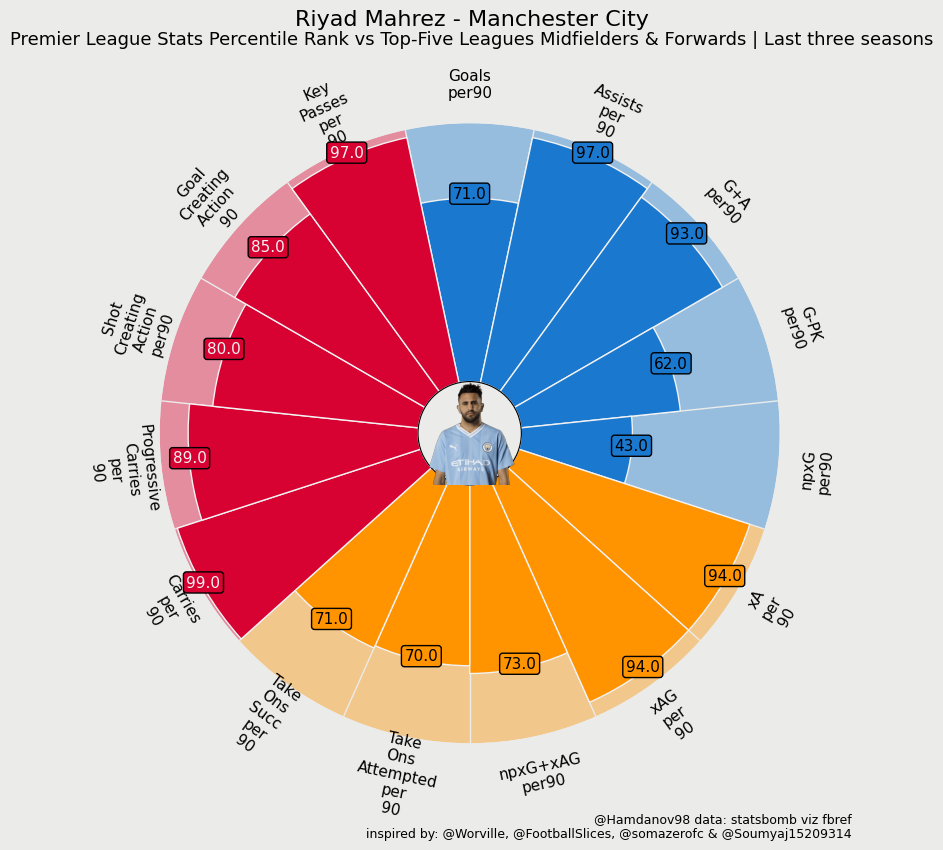

In [37]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mahrez_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Riyad Mahrez - Manchester City", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders & Forwards | Last three seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Mahrez/Mahrez_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


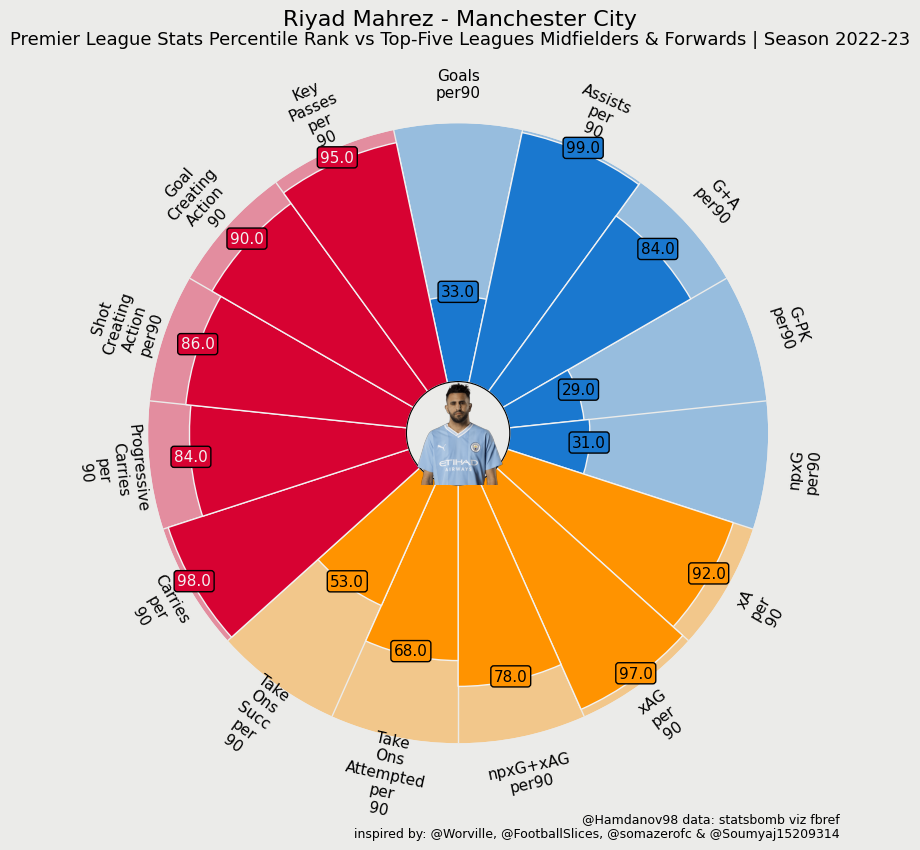

In [40]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mahrez_2023_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Riyad Mahrez - Manchester City", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders & Forwards | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Mahrez_2023/Mahrez_2023_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


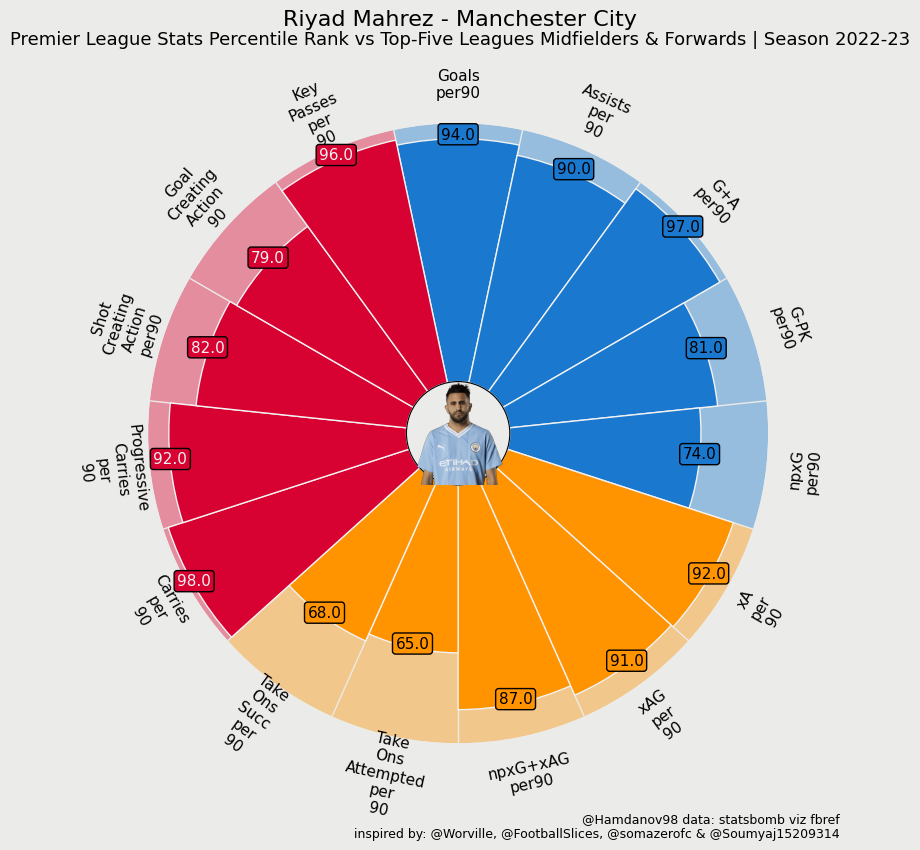

In [41]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mahrez_2022_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Riyad Mahrez - Manchester City", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders & Forwards | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Mahrez_2022/Mahrez_2022_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


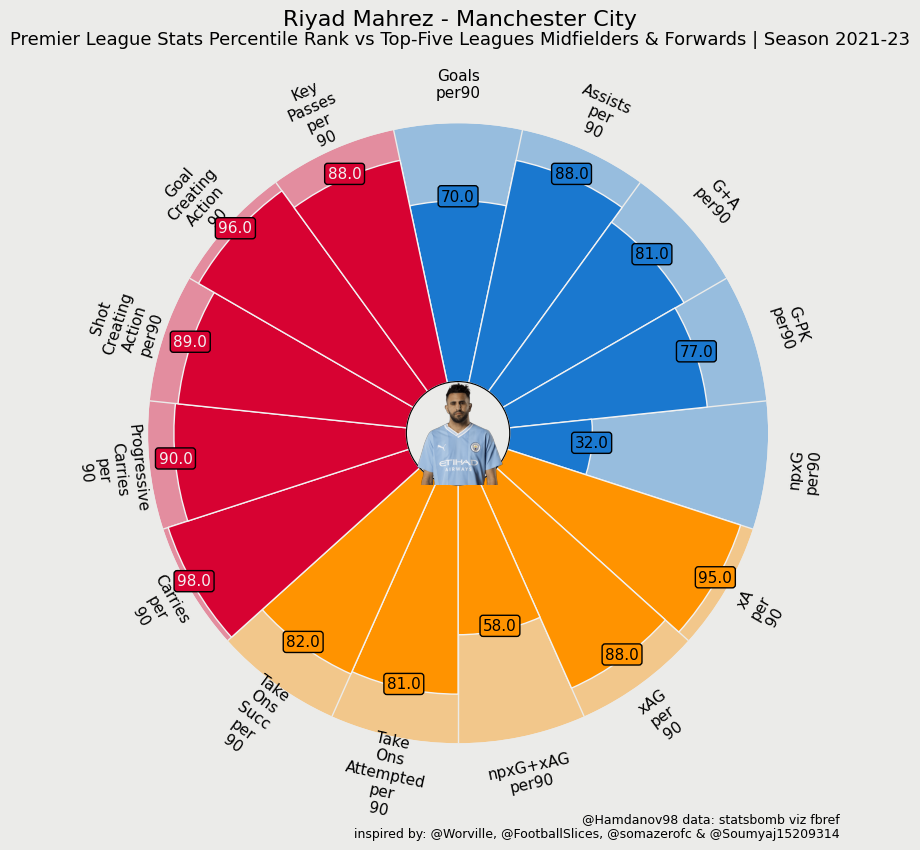

In [42]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mahrez_2021_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Riyad Mahrez - Manchester City", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders & Forwards | Season 2021-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Mahrez_2021/Mahrez_2021_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [43]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_forward_players = forward_players.select_dtypes(include=np.number)
numerical_forward_players = numerical_forward_players.iloc[:, 3:]
numerical_forward_players = numerical_forward_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_forward_players = (numerical_forward_players - numerical_forward_players.mean()) / numerical_forward_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_forward_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.288890028269857,
 0.4025267176084718,
 0.4773182676218046,
 0.5304227868525193,
 0.5734897516679813,
 0.6113597891968661,
 0.6400267660783744,
 0.6638585397490556,
 0.6852367236817083,
 0.7051360278899178,
 0.7233426337126707,
 0.739917816732523,
 0.7551006979310749,
 0.769263732398443,
 0.7823716658612285]

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_forward_players.index)



In [45]:
# Remove Declan Rice's row and store it in a separate variable
rice_data = transformed_df.iloc[121].copy()
transformed_df = transformed_df.drop(transformed_df.index[121])

# Compute cosine similarity between each player and Declan Rice
similarity_scores = cosine_similarity(transformed_df, rice_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_mahrez'] = similarity_scores

# Display the top 10 players most similar to rice
top_similar_players = transformed_df.sort_values('similarity_to_mahrez', ascending=False).head(10)
top_similar_players

0         1         2         3         4         5         6  \
35   10.919588  1.522370 -0.060961  2.752212  0.595484 -0.940006 -1.139547   
82   12.225847 -0.332408 -0.329703 -1.541943  2.011026 -0.853107 -0.375807   
110  13.175623 -1.111897  4.603892  3.969200  0.562757  0.163855  0.394698   
127  12.806239 -1.413657 -1.452856 -2.600486  2.526940  0.232843  2.149116   
109  15.458897 -3.753049 -5.031201  0.164742  0.040410 -0.294218  0.959600   
137  27.751459  4.107989 -0.145438  2.788247  5.144520  3.037823  0.330400   
88   10.796534  1.171385 -2.425311 -1.674853  2.242062  0.645615  1.025662   
13   12.816151  1.446596  3.241724  3.644779  1.358715  2.409814  4.605950   
95   10.418562  1.641086  1.721717 -0.998094 -3.031452 -2.020330  1.253854   
155  16.665533 -3.769874  0.896177  5.507025 -0.559592  0.438030  0.169937   

            7         8         9        10        11        12        13  \
35  -0.801816  0.524609 -1.221018  1.213771  1.669458  2.935220 -0.644931   
82   2.267761 -0.254910 -1.979499  0.825036 -0.025296  1.806768 -1.156808   
110 -0.322253  2.106633 -0.183990  0.577049  2.927597  0.726701 -1.116427   
127  0.012563 -2.431178 -0.124751  3.152044  1.685418  3.056467  0.260881   
109  2.137702 -0.008901 -1.242000  2.452084 -1.415994  1.029890  1.459360   
137  3.985815  0.812885  4.382344 -3.704801 -0.584357 -0.994572 -0.618026   
88   2.457730 -0.754862  0.335193  2.592788 -1.620997  0.684184 -0.527009   
13  -0.820219 -0.051301  0.121529 -0.836312 -0.340362 -0.163613  1.248569   
95  -0.845036 -1.886879  0.463389  1.055601  1.692293  5.020212 -0.051570   
155  1.465585 -2.009306  1.397326 -1.579143 -2.313178 -1.835016 -0.188728   

           14  similarity_to_mahrez  
35  -1.031753              0.962171  
82  -0.618240              0.891605  
110  0.230329              0.875110  
127 -2.459907              0.873740  
109 -2.042477              0.848504  
137 -1.926388              0.838876  
88   1.740929              0.834683  
13   2.974654              0.833288  
95  -1.314195              0.832131  
155  0.054858              0.826442

In [46]:
# Get the top 10 players most similar to rice
top_similar_players_indices = transformed_df.sort_values('similarity_to_mahrez', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players = forward_players.loc[top_similar_players_indices]
top_similar_players

Unnamed: 0                    Player   Nation    Pos  \
35          148                Phil Foden  eng ENG  FW,MF   
82          390              Jadon Sancho  eng ENG  FW,MF   
110         515             Julian Brandt   de GER  FW,MF   
127         589             Jack Grealish  eng ENG  FW,MF   
109         514           Ousmane Dembélé   fr FRA     FW   
137         631              Lionel Messi   ar ARG  FW,MF   
88          428                Leroy Sané   de GER  FW,MF   
13           48          Domenico Berardi   it ITA     FW   
95          449               Bukayo Saka  eng ENG  FW,MF   
155         696            Ángel Di María   ar ARG  FW,MF   
2             7              Serge Gnabry   de GER  FW,MF   
4            12           Matteo Politano   it ITA  FW,MF   
113         526                  Raphinha   br BRA  FW,MF   
100         475             Jonas Hofmann   de GER  FW,MF   
67          328           Ademola Lookman   ng NGA  FW,MF   
150         671              Paulo Dybala   ar ARG     FW   
135         621             Marco Asensio   es ESP  FW,MF   
154         687            Kingsley Coman   fr FRA  FW,MF   
119         558         Antoine Griezmann   fr FRA  FW,MF   
170         769           Gerard Deulofeu   es ESP     FW   
222        1002             Michael Olise   fr FRA  FW,MF   
128         592               Luis Muriel   co COL     FW   
89          429        Christopher Nkunku   fr FRA  FW,MF   
204         909                Martinelli   br BRA     FW   
245        1098                   Willian   br BRA     FW   
144         651                Iago Aspas   es ESP     FW   
133         614              Moussa Diaby   fr FRA  FW,MF   
112         522           Roberto Firmino   br BRA     FW   
16           54             Kylian Mbappé   fr FRA     FW   
141         647             Son Heung-min   kr KOR     FW   
64          305               Musa Barrow   gm GAM  FW,MF   
40          177             Mohamed Salah   eg EGY     FW   
72          343           Andrej Kramarić   hr CRO  FW,MF   
165         761           Felipe Anderson   br BRA     FW   
69          335                   Rodrygo   br BRA     FW   
92          436             Karim Benzema   fr FRA     FW   
97          468           Raheem Sterling  eng ENG     FW   
24          107             Saïd Benrahma   dz ALG  FW,MF   
1             3           Vinicius Júnior   br BRA     FW   
339        2349             Edon Zhegrova   xk KVX  FW,MF   
105         495             Emil Forsberg   se SWE  FW,MF   
168         764                Elif Elmas   mk MKD  FW,MF   
139         640             Pablo Fornals   es ESP  FW,MF   
189         851              Alexis Flips   fr FRA  FW,MF   
247        1108               Leon Bailey   jm JAM  FW,MF   
224        1020              Nicolas Pépé   ci CIV  FW,MF   
61          277           Marcus Rashford  eng ENG     FW   
237        1077                Pedro Neto   pt POR  FW,MF   
163         744          Karl Toko Ekambi   cm CMR     FW   
49          198                Sadio Mané   sn SEN     FW   
118         557            Florian Sotoca   fr FRA     FW   
85          405               Rafael Leão   pt POR     FW   
68          329           Mikel Oyarzabal   es ESP  FW,MF   
8            22             Alassane Pléa   fr FRA     FW   
78          372              Maxime Lopez   fr FRA  FW,MF   
303        1214     Khvicha Kvaratskhelia   ge GEO     FW   
20           66              Amine Gouiri   fr FRA  FW,MF   
48          197             Gabriel Jesus   br BRA     FW   
239        1079                Adam Ounas   dz ALG  FW,MF   
142         649               Moses Simon   ng NGA  FW,MF   
203         907     Isaac Palazón Camacho   es ESP  FW,MF   
27          127            Hirving Lozano   mx MEX     FW   
195         871             Nedim Bajrami   al ALB  FW,MF   
158         720       Alexis Saelemaekers   be BEL     FW   
123         576         Riccardo Orsolin

In [47]:
forward_players['similarity_to_mahrez']=transformed_df['similarity_to_mahrez']
forward_players[['Player', 'similarity_to_mahrez']]


Player  similarity_to_mahrez
0                Adama Traoré              0.178097
1             Vinicius Júnior              0.619571
2                Serge Gnabry              0.815399
3                 Raúl García             -0.361044
4             Matteo Politano              0.813219
5              El Bilal Touré             -0.465736
6                       Portu             -0.100482
7                  Danny Ings             -0.454339
8               Alassane Pléa              0.536378
9                M'Bala Nzola             -0.418327
10           Mama Samba Baldé             -0.449774
11             Borja Iglesias             -0.535856
12             Joaquín Correa              0.404652
13           Domenico Berardi              0.833288
14                Lucas Höler             -0.159115
15              Patrik Schick             -0.376276
16              Kylian Mbappé              0.686486
17              Lucas Ocampos              0.327781
18                Neal Maupay             -0.306533
19              Ollie Watkins             -0.126813
20               Amine Gouiri              0.520134
21              Wilfried Zaha              0.351588
22              Harvey Barnes              0.409420
23             Dušan Vlahović             -0.302986
24              Saïd Benrahma              0.637821
25          Wissam Ben Yedder              0.287628
26        Alexandre Lacazette              0.112265
27             Hirving Lozano              0.501290
28             Dodi Lukebakio              0.081298
29              Rubén Sobrino             -0.500337
30                Sada Thioub              0.380893
31            Ludovic Ajorque             -0.062200
32         Robert Lewandowski              0.229892
33              Karim Onisiwo             -0.227478
34            Arkadiusz Milik             -0.344540
35                 Phil Foden              0.962171
36                  Joelinton              0.206106
37          Randal Kolo Muani             -0.059287
38             Iñaki Williams             -0.114934
39           Antonio Sanabria             -0.412104
40              Mohamed Salah              0.684334
41             Emmanuel Gyasi             -0.035882
42              Tammy Abraham             -0.320230
43              Kevin Lasagna             -0.582922
44                 Lucas Boyé             -0.197359
45        Allan Saint-Maximin              0.293681
46              Marco Richter              0.193906
47                Jamie Vardy             -0.445450
48              Gabriel Jesus              0.517695
49                 Sadio Mané              0.541426
50             Jonathan David              0.042511
51          Gianluca Scamacca             -0.491876
52          Kelechi Iheanacho              0.180501
53               Ante Budimir             -0.725148
54              Gerard Moreno              0.462467
55              Kevin Agudelo             -0.104326
56               Duván Zapata              0.327980
57                       Kike             -0.626934
58                Ondrej Duda              0.314845
59             Alexander Isak             -0.323651
60              Romelu Lukaku              0.104316
61            Marcus Rashford              0.544671
62             Martin Terrier              0.446626
63            Sergi Guardiola             -0.751304
64                Musa Barrow              0.685217
65       Mathias Pereira Lage             -0.120913
66      Dominic Calvert-Lewin             -0.622933
67            Ademola Lookman              0.779624
68            Mikel Oyarzabal              0.536762
69                    Rodrygo              0.670286
70               Wahbi Khazri             -0.035480
71           Francesco Caputo             -0.306403
72            Andrej Kramarić              0.683371
73             Anthony Lozano             -0.695834
74                     Joselu             -0.166246
75         Luis Javier Suárez             -0.553465
76           Nicolá

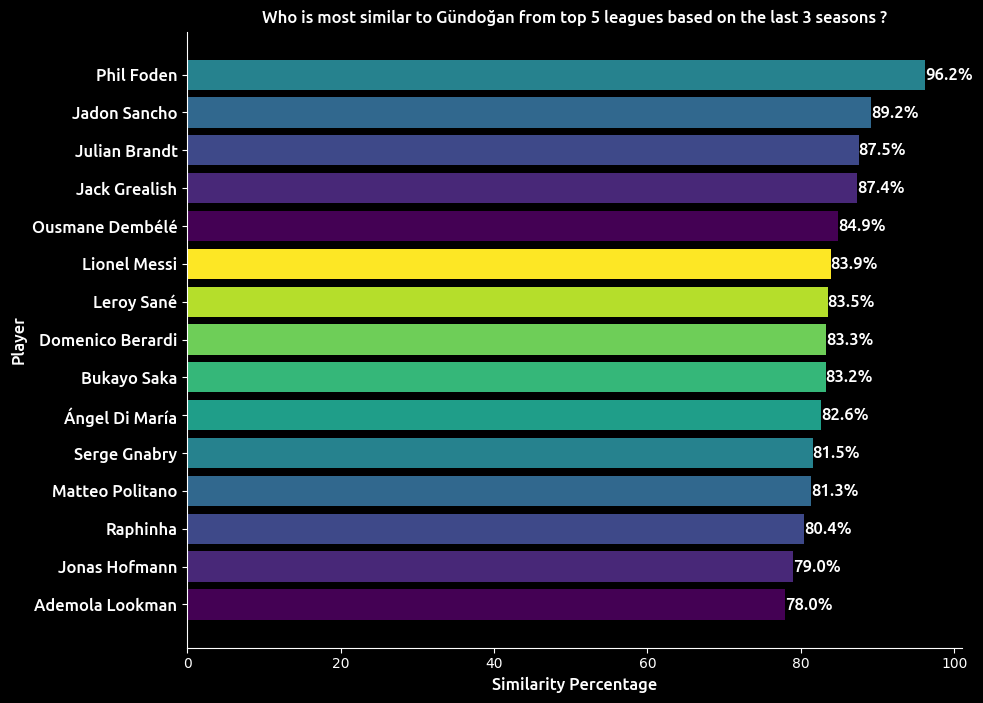

In [48]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the forward_players DataFrame by similarity_to_rice in descending order
forward_players_sorted = forward_players.sort_values(by='similarity_to_mahrez', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(forward_players_sorted['Player'].head(15)[::-1], (forward_players_sorted['similarity_to_mahrez'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Gündoğan from top 5 leagues based on the last 3 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(forward_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Mahrez/Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
